# K Nearest Neighbors with Python





## Import Libraries



In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data
clean data from my titanic kernel

Set index_col=0 to use the first column as the index.

In [199]:
df = pd.read_csv("../input/kaggle-join-data-with-preproces/data.csv",index_col=0)

In [200]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 92.0 KB


## Standardize the Variables



In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
scaler = StandardScaler()

In [204]:
scaler.fit(df.drop('Survived',axis=1))

StandardScaler()

In [205]:
scaled_features = scaler.transform(df.drop('Survived',axis=1))

In [206]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.841916,0.743497,-0.576924,0.481288,-0.445,-0.505769,0.618968
1,-1.546098,-1.344995,0.664062,0.481288,-0.445,0.786802,-1.832558
2,0.841916,-1.344995,-0.266678,-0.479087,-0.445,-0.492144,0.618968
3,-1.546098,-1.344995,0.431377,0.481288,-0.445,0.419755,0.618968
4,0.841916,0.743497,0.431377,-0.479087,-0.445,-0.489620,0.618968


## Train Test Split

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Survived'],
                                                    test_size=0.319)


## Using KNN



In [209]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
knn = KNeighborsClassifier(n_neighbors=1)

In [211]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [212]:
pred = knn.predict(X_test)

## Predictions and Evaluations


In [213]:
from sklearn.metrics import classification_report,confusion_matrix

In [214]:
print(confusion_matrix(y_test,pred))

[[221  32]
 [ 42 123]]


In [215]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       253
           1       0.79      0.75      0.77       165

    accuracy                           0.82       418
   macro avg       0.82      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [216]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

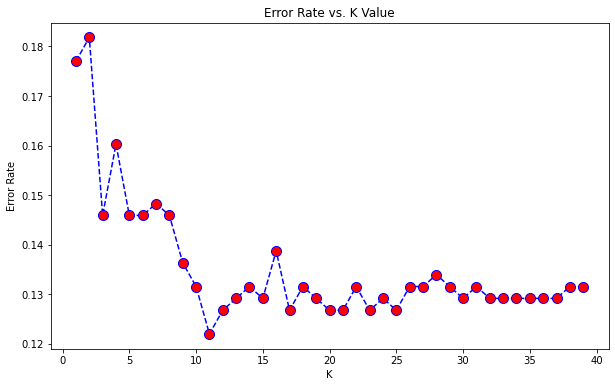

In [217]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [218]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[221  32]
 [ 42 123]]


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       253
           1       0.79      0.75      0.77       165

    accuracy                           0.82       418
   macro avg       0.82      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



In [219]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[232  21]
 [ 36 129]]


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       253
           1       0.86      0.78      0.82       165

    accuracy                           0.86       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



In [220]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=13


[[238  15]
 [ 39 126]]


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       253
           1       0.89      0.76      0.82       165

    accuracy                           0.87       418
   macro avg       0.88      0.85      0.86       418
weighted avg       0.87      0.87      0.87       418



In [221]:
# NOW WITH K=19
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[236  17]
 [ 37 128]]


              precision    recall  f1-score   support

           0       0.86      0.93      0.90       253
           1       0.88      0.78      0.83       165

    accuracy                           0.87       418
   macro avg       0.87      0.85      0.86       418
weighted avg       0.87      0.87      0.87       418



 #                            Thanks !